In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt

data_file = 'arxiv-metadata-oai-snapshot.json'

> The following blocks should be run only if you want to reparse the Kaggle JSON list, otherwise it is recommended to jump to reading the `papers.csv` file.

In [2]:
# Due to some limitations of Python, the entire JSON file cannot be opened so we will parse it line by line
def get_metadata():
    with open(data_file, 'r') as f:
        for line in f:
            yield line

In [3]:
# Lists for all of the information we will retain from the JSON
title = []
pid = []
vers = []
cats = []
first_vers_date = []
last_vers_date = []

metadata = get_metadata()
for paper in metadata:
    js = json.loads(paper)
    vs = js.get('versions')
    # Only add a paper if it has more than one version
    if len(vs) > 1:
        title.append(js.get('title'))
        pid.append(js.get('id'))
        vers.append(len(vs))
        cats.append(js.get('categories'))
        first_vers_date.append(js.get('versions')[0].get('created'))
        last_vers_date.append(js.get('versions')[len(vs) - 1].get('created'))

In [4]:
# Build a DataFrame from the extracted information
papers = pd.DataFrame({
    'title': title,
    'id': pid,
    'categories': cats,
    'versions': vers,
    'first_version_date': first_vers_date,
    'last_version_date': last_vers_date
})

In [5]:
papers['first_version_date'] = pd.to_datetime(papers['first_version_date'])
papers['last_version_date'] = pd.to_datetime(papers['last_version_date'])

In [6]:
papers.head()

,title,id,categories,versions,first_version_date,last_version_date
0,Calculation of prompt diphoton production cros...,0704.0001,hep-ph,2,2007-04-02 19:18:42+00:00,2007-07-24 20:10:27+00:00
1,Sparsity-certifying Graph Decompositions,0704.0002,math.CO cs.CG,2,2007-03-31 02:26:18+00:00,2008-12-13 17:26:00+00:00
2,The evolution of the Earth-Moon system based o...,0704.0003,physics.gen-ph,3,2007-04-01 20:46:54+00:00,2008-01-13 00:36:28+00:00
3,Polymer Quantum Mechanics and its Continuum Limit,0704.0007,gr-qc,2,2007-03-31 04:27:22+00:00,2007-08-22 22:42:11+00:00
4,Numerical solution of shock and ramp compressi...,0704.0008,cond-mat.mtrl-sci,3,2007-03-31 04:47:20+00:00,2008-07-01 18:54:28+00:00


In [ ]:
papers.to_csv('papers.csv', index=False)

Start from here if you skipped reparsing the Kaggle JSON file.

In [4]:
# a better way of reading the csv file should be used, this is inefficient as it considers
# the entire file (low_memory=False) instead of reading it line by line. This is because, for some reason,
# pandas does not know how to parse the dates.
papers = pd.read_csv('papers.csv', parse_dates=['first_version_date', 'last_version_date'], low_memory=False)

In [23]:
# Open JSON file with categories
categories_path = 'categories.json'
f = open(categories_path)
categories = json.load(f)

In [24]:
# create dict with number of papers in each subcategory (astro-ph.GA, hep-th etc.)
sub_counts = {}
for category in categories:
    sub_counts[category] = {}
    for subcategory in categories[category]:
        sub_counts[category][subcategory] = 0

for index, row in papers.iterrows():
    # a paper may have more than one category, so the string must be split
    for self_category in row['categories'].split():
        for category in categories:
            if self_category in categories[category]:
                sub_counts[category][self_category] += 1

In [9]:
# get counts for each category (physics, com sci etc.) by adding up the values for each subcategory 
cat_counts = {}
for category in categories:
    cat_counts[category] = 0
    for subcategory in categories[category]:
        cat_counts[category] += sub_counts[category][subcategory]

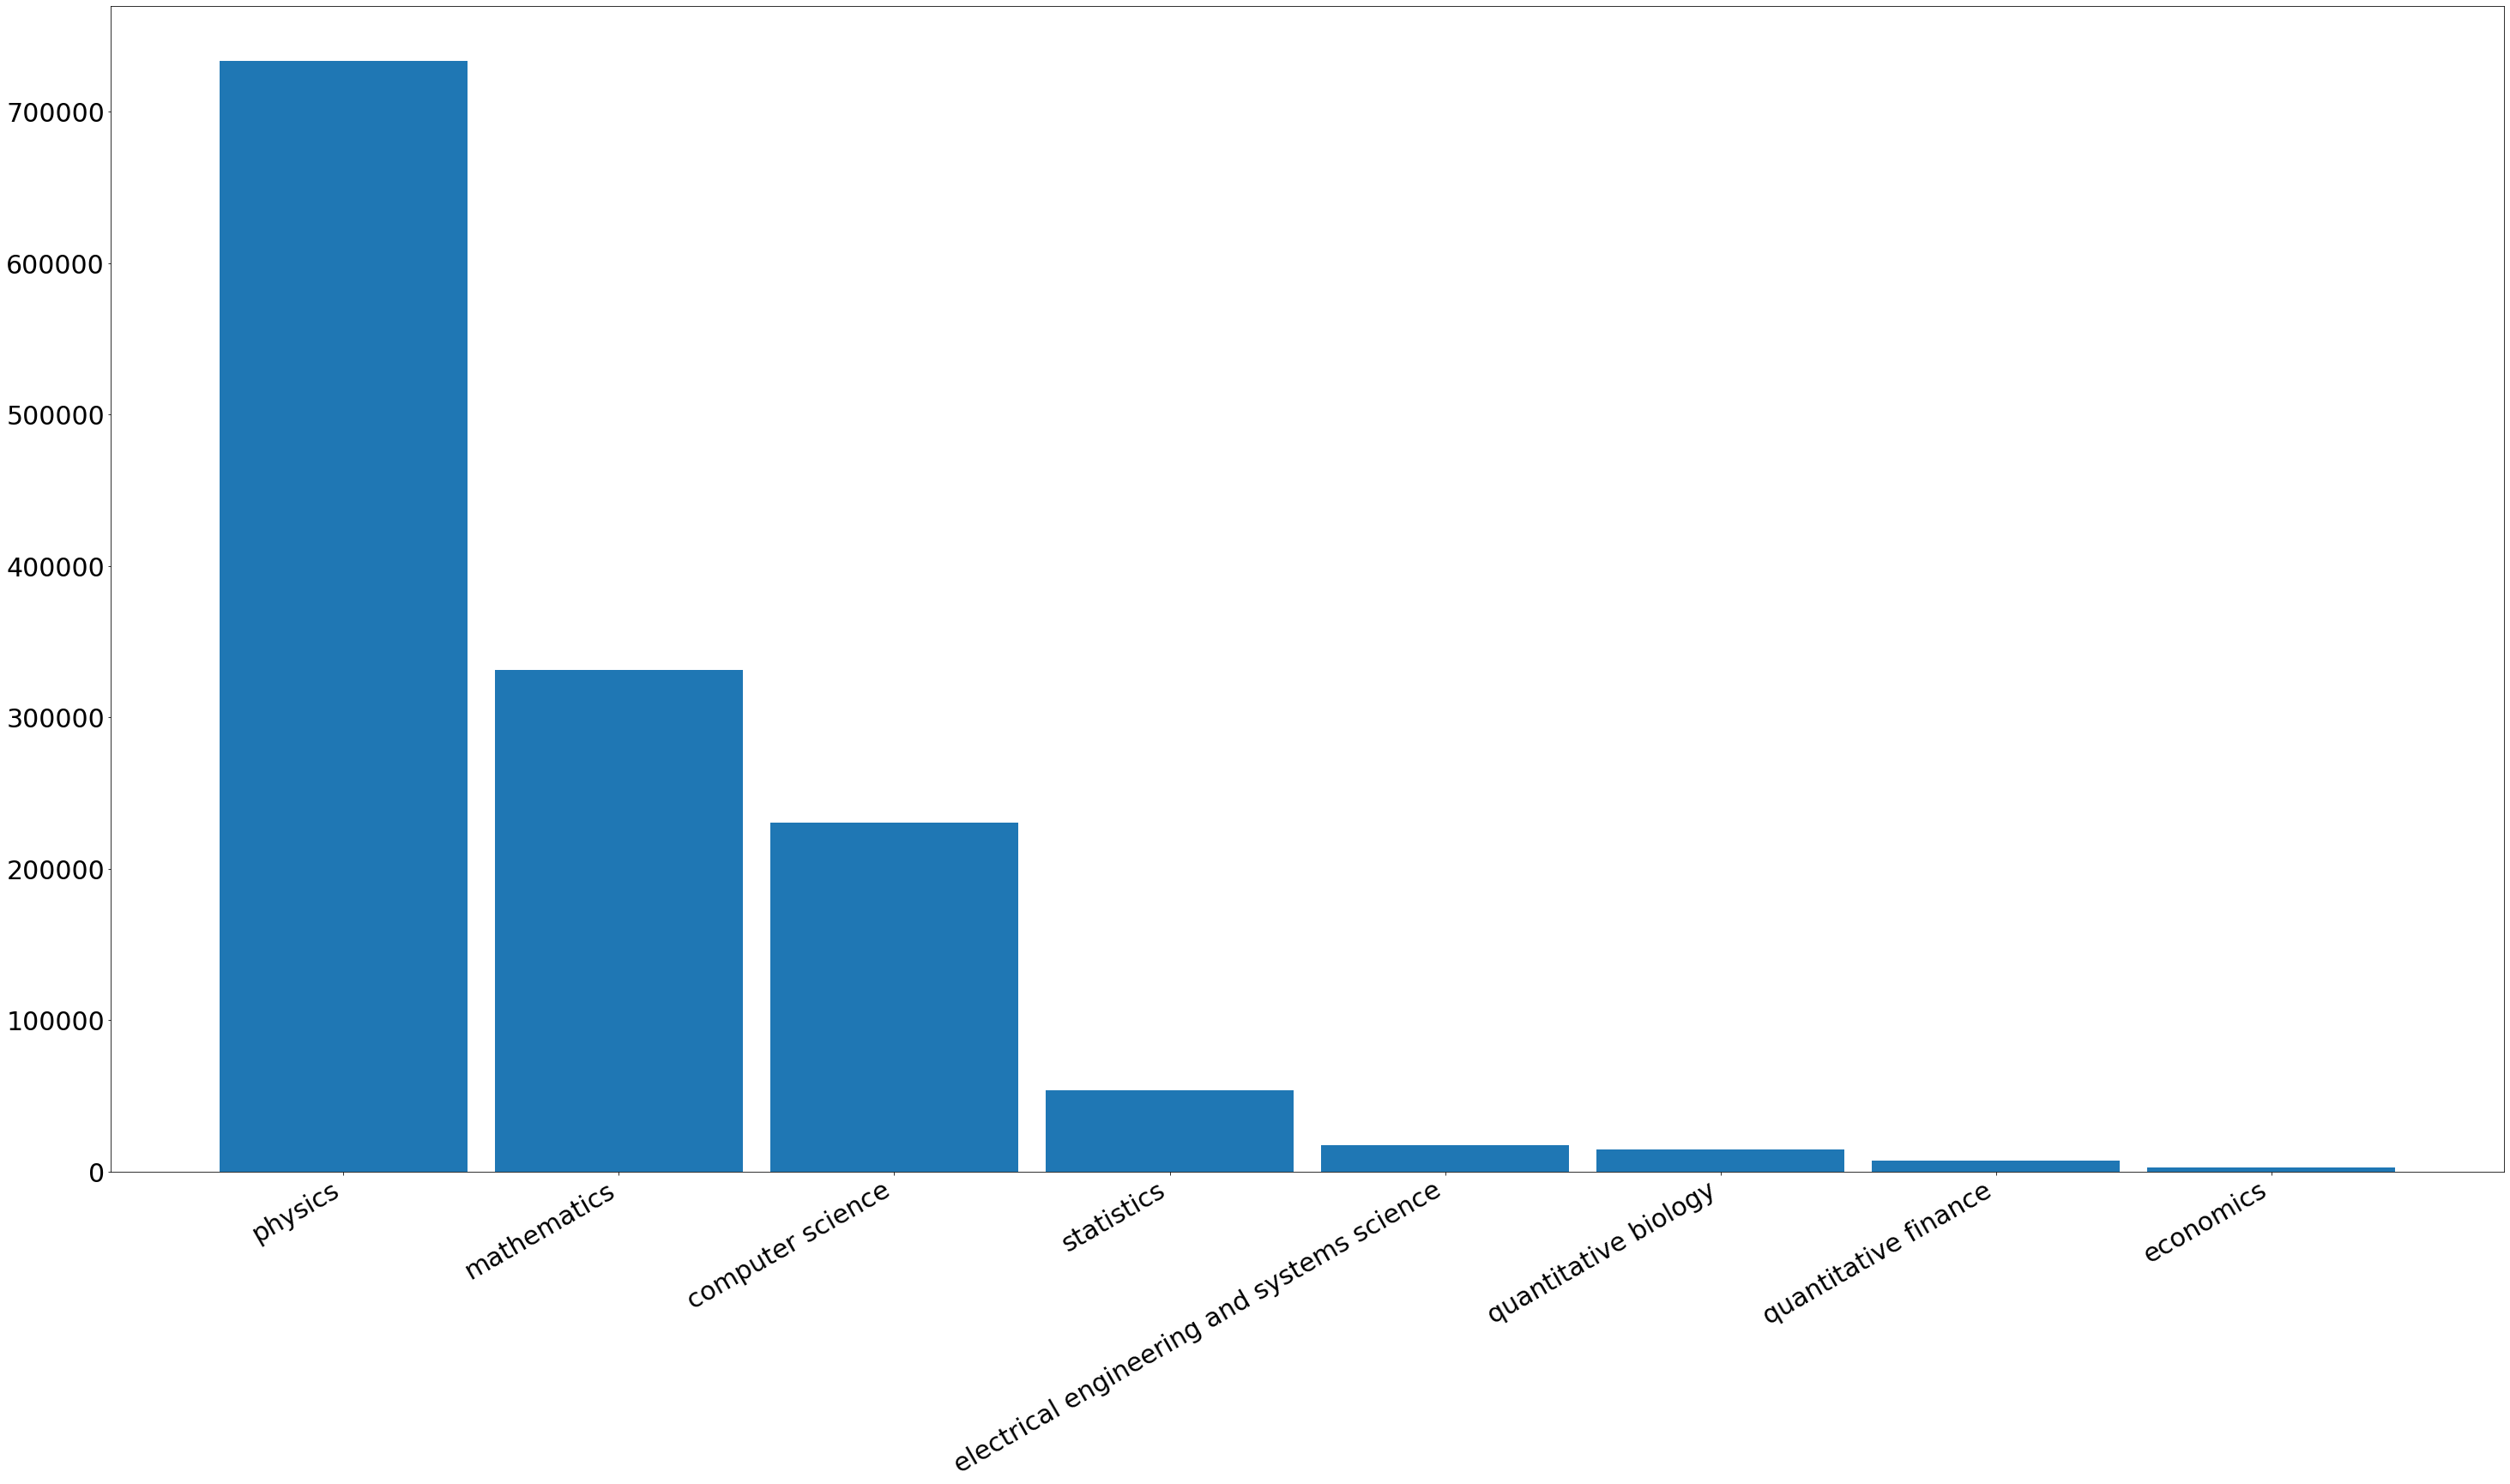

In [11]:
# Create bar plot with major categories

# turn dict of category counts into list of tuples and sort it by the second element
cat_counts_sorted = sorted(list(cat_counts.items()), key = lambda x: x[1], reverse=True)

cat_labels = [tpl[0] for tpl in cat_counts_sorted]
cat_values = [tpl[1] for tpl in cat_counts_sorted]
  
fig = plt.figure(figsize = (50, 25))
ax = plt.gca()

plt.bar(cat_labels, cat_values, width = 0.9)

plt.xticks(rotation=30, ha='right')
ax.tick_params(axis='both', labelsize=30)

plt.show()

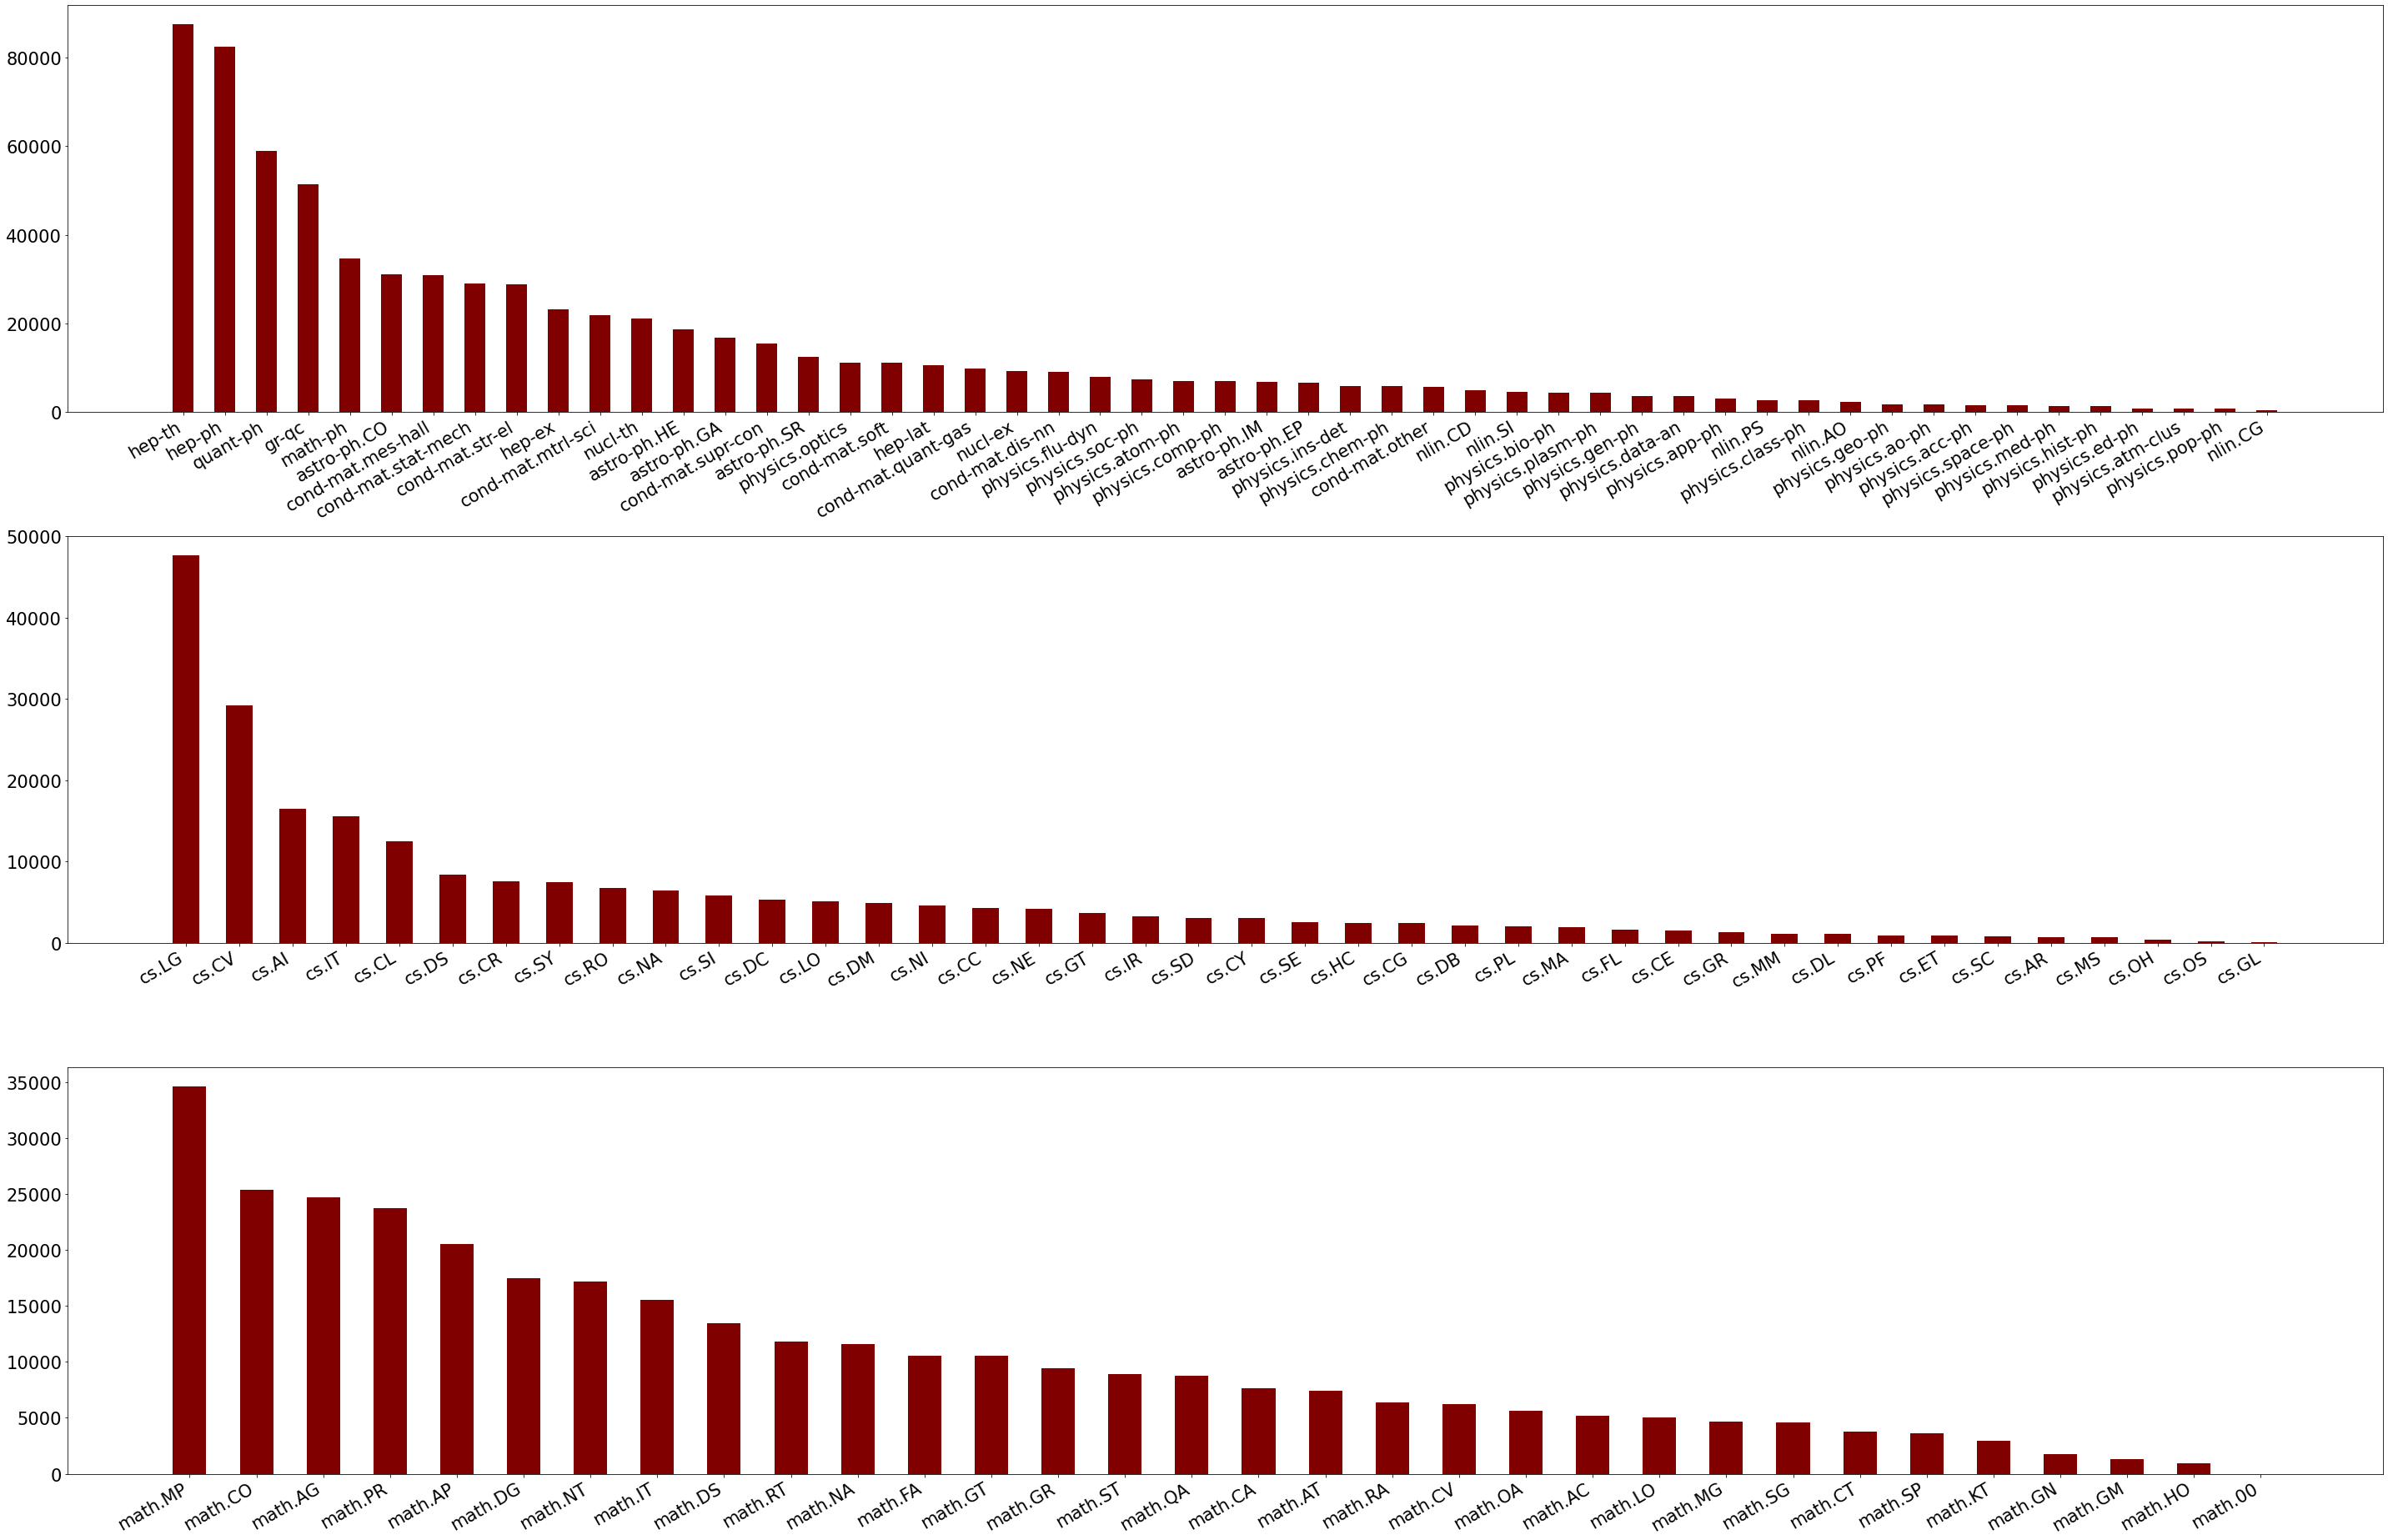

In [12]:
# Create bar plot with physics subcategories
plt.figure(figsize=(40, 25))

for i, subcat in enumerate(['physics', 'computer science', 'mathematics']):
    # turn dict of subcategory counts into list of tuples and sort it by the second element
    subcat_counts_sorted = sorted(list(sub_counts[subcat].items()), key = lambda x: x[1], reverse=True)
    subcat_labels = [tpl[0] for tpl in subcat_counts_sorted]
    subcat_values = [tpl[1] for tpl in subcat_counts_sorted]

    plt.subplot(3, 1, i + 1)
    plt.tight_layout()
    
    plt.bar(subcat_labels, subcat_values, color ='maroon', width = 0.5)

    plt.xticks(rotation=30, ha='right')
    plt.gca().tick_params(axis='both', labelsize=21)

plt.show()

In [13]:
print("Mean: ", papers['versions'].mean())

print("Std:  ", papers['versions'].std())

Mean:  2.4876424445059944
Std:   1.0952173624079764


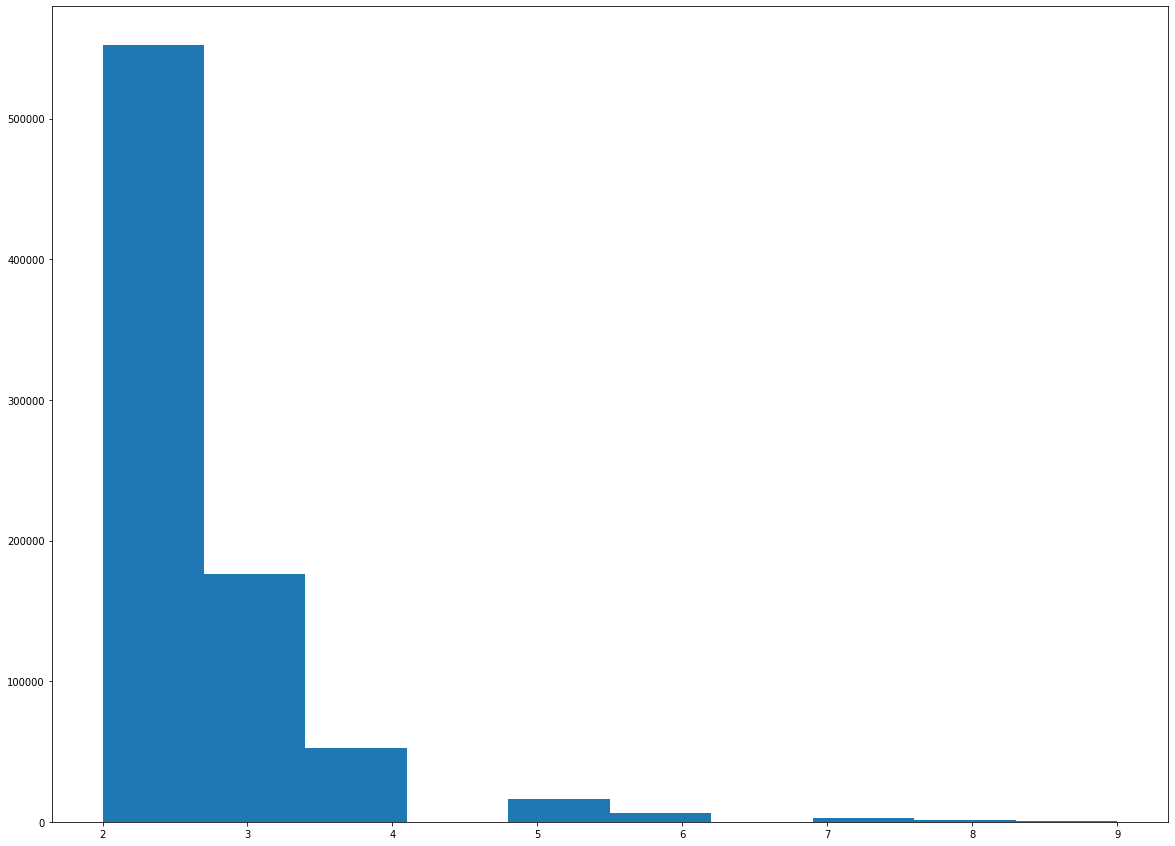

In [15]:
plt.figure(figsize=(20, 15))
plt.hist(papers.loc[papers['versions'] < 10]['versions'])

plt.show()

In [16]:
papers.loc[papers['versions'] == 3]

,title,id,categories,versions,first_version_date,last_version_date
2,The evolution of the Earth-Moon system based o...,0704.0003,physics.gen-ph,3,2007-04-01 20:46:54+00:00,2008-01-13 00:36:28+00:00
4,Numerical solution of shock and ramp compressi...,0704.0008,cond-mat.mtrl-sci,3,2007-03-31 04:47:20+00:00,2008-07-01 18:54:28+00:00
5,Computing genus 2 Hilbert-Siegel modular forms...,0704.0011,math.NT math.AG,3,2007-03-31 05:32:49+00:00,2008-08-20 13:15:09+00:00
12,"Placeholder Substructures II: Meta-Fractals, M...",0704.0026,math.RA,3,2007-03-31 12:24:06+00:00,2007-11-22 01:13:37+00:00
20,Multilinear function series in conditionally f...,0704.0040,math.OA math.FA,3,2007-03-31 17:05:04+00:00,2008-09-05 03:11:45+00:00
...,...,...,...,...,...,...
808719,On two aspects of the Painleve analysis,solv-int/9909027,solv-int math-ph math.AP math.MP nlin.SI,3,1999-09-26 06:55:08+00:00,2013-03-27 12:32:19+00:00
808726,Real forms of the complex twisted N=2 supersym...,solv-int/9912010,solv-int hep-th math-ph math.MP nlin.SI,3,1999-12-15 19:15:16+00:00,2000-10-01 00:00:00+00:00
808729,The string model of the Cooper pair in the ani...,supr-con/9510001,supr-con cond-mat.supr-con hep-th,3,1995-10-11 10:18:24+00:00,1996-07-04 06:35:28+00:00
808733,Ginzburg-Landau-Gor'kov Theory of Magnetic osc...,supr-con/9608004,supr-con cond-mat.supr-con,3,1996-08-14 16:35:44+00:00,1997-04-11 22:08:12+00:00


In [18]:
papers['versions'].max()

187

In [17]:
papers.iloc[44676]

title                 Quantal statistical phase factor accompanying ...
id                                                            0903.5132
categories                                                     quant-ph
versions                                                            187
first_version_date                            2009-03-30 06:24:54+00:00
last_version_date                             2009-09-09 03:14:46+00:00
Name: 44676, dtype: object

In [20]:
papers["versions"].describe()

count    808736.000000
mean          2.487642
std           1.095217
min           2.000000
25%           2.000000
50%           2.000000
75%           3.000000
max         187.000000
Name: versions, dtype: float64

In [39]:
def is_math(x):
    for self_cat in x.split():
        for subcat in categories["mathematics"]:
            if subcat == self_cat:
                return True
    return False

In [51]:
def is_cs(x):
    for self_cat in x.split():
        for subcat in categories["computer science"]:
            if subcat == self_cat:
                return True
    return False

In [106]:
math_papers = papers.loc[papers["categories"].apply(is_math)].reset_index(drop=True).sample(frac=1)

In [107]:
cs_papers = papers.loc[papers["categories"].apply(is_cs)].reset_index(drop=True).sample(frac=1)

In [108]:
math_papers.to_csv('math_papers.csv', index=False)

In [109]:
cs_papers.to_csv('cs_papers.csv', index=False)